<a href="https://colab.research.google.com/github/jbuzzio/DeepLearning/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

# Descarga y descompresion del dataset que se encuentra en google drive

In [ ]:
file_id = "1R2Za2aHaGTyoc0lbmPb0TxjFRQ4TgO0Y" #ID del archivo en google drive
destination = "cicids2017_dataset"

# Descargar el archivo
!gdown --id "$file_id" -O "$destination"

# Descomprimir el archivo
!unzip -q "$destination" -d "/content"
!rm cicids2017_dataset

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1R2Za2aHaGTyoc0lbmPb0TxjFRQ4TgO0Y
From (redirected): https://drive.google.com/uc?id=1R2Za2aHaGTyoc0lbmPb0TxjFRQ4TgO0Y&confirm=t&uuid=5623c1db-0243-4090-9576-1930119e49b3
To: /content/cicids2017_dataset
100% 31.2M/31.2M [00:00<00:00, 215MB/s]
replace /content/cicids2017_dataset.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
rm: cannot remove 'cicids2017_dataset.': No such file or directory


In [ ]:
import os
import numpy as np
import sklearn.preprocessing as skpp
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar el dataset

In [ ]:
dataset = np.load("/content/cicids2017_dataset.npz")
X = dataset['X']
y = dataset['y']

In [ ]:
labels = pd.DataFrame(y, columns=['label'])
labels

,label
0,benign
1,benign
2,benign
3,benign
4,benign
...,...
15604,PortScan
15605,PortScan
15606,PortScan
15607,PortScan


# Distribucion de las clases en el dataset

In [ ]:
distribucion_clases= {}
for i in labels['label'].unique():
  distribucion_clases[i] =len(labels[labels['label'] == i])

In [ ]:
distribucion_clases

{'benign': 12618, 'ddos': 711, 'dos': 1398, 'PortScan': 882}

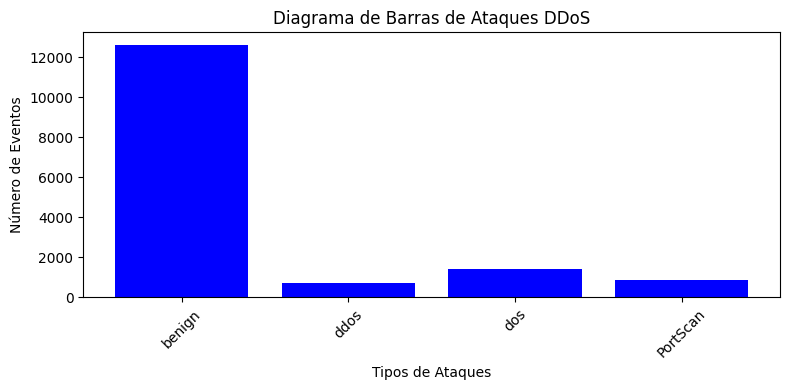

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(distribucion_clases.keys(),distribucion_clases.values(), color='blue')
plt.title('Diagrama de Barras de Ataques DDoS')
plt.xlabel('Tipos de Ataques')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El dataset consta de 15609 imágenes producto de transformar el dataset CICIDS2017. Cada imagen tiene una dimension de 60x60 con 3 canales.

In [ ]:
X.shape, labels.shape

((15609, 60, 60, 3), (15609, 1))

In [ ]:
clases = np.unique(labels)
print("Clases únicas:", clases)

Clases únicas: ['PortScan' 'benign' 'ddos' 'dos']


# Ploteamos algunas imágenes del dataset


In [ ]:
muestras = {}

for clase in clases:
    # Encuentra el índice de la primera imagen de esta clase
    indice = np.where(y == clase)[0][0]
    muestras[clase] = X[indice]

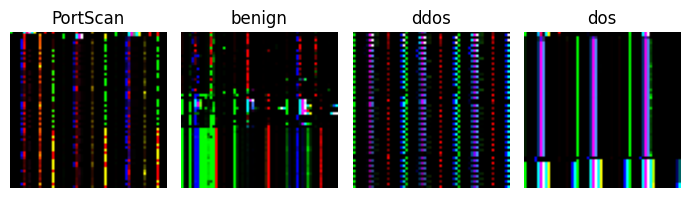

In [ ]:
num_clases = 4

# Crea la figura y subplots
fig, axes = plt.subplots(1, 4, figsize=(7, 6))
axes = axes.flatten()  # Aseguramos que los ejes sean una lista plana

# Rellena los subplots con las imágenes representativas
for i, clase in enumerate(clases):
    axes[i].imshow(muestras[clase])
    axes[i].set_title(f"{clase}")
    axes[i].axis("off")  # Oculta los ejes

# Desactiva subplots vacíos si hay más subplots que clases
for j in range(num_clases, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()